# Question 1: 

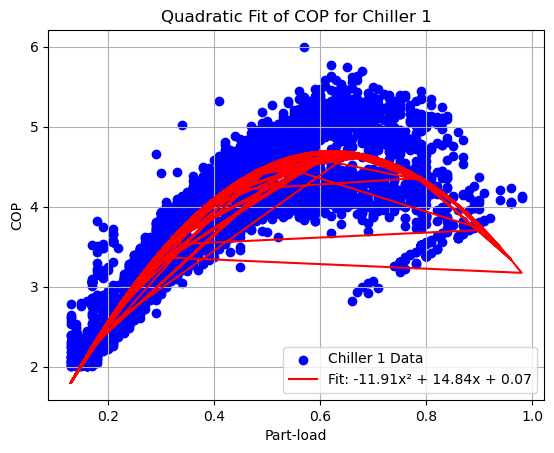

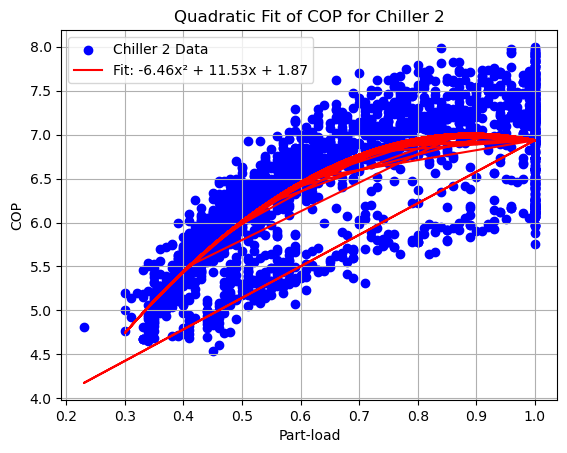

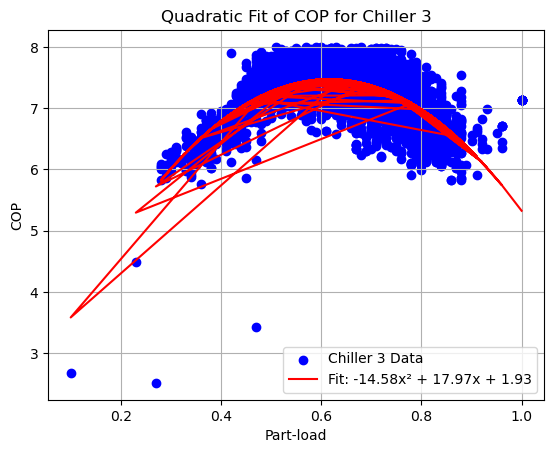

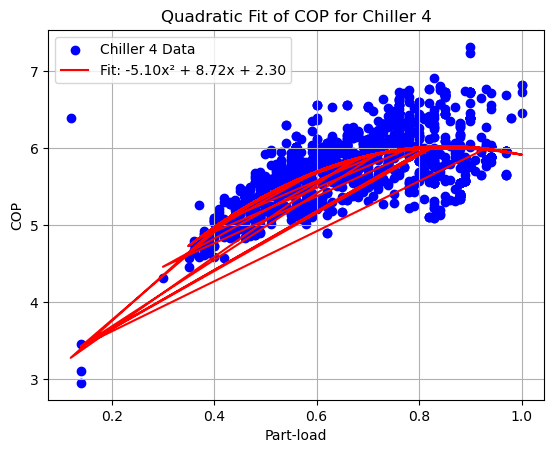

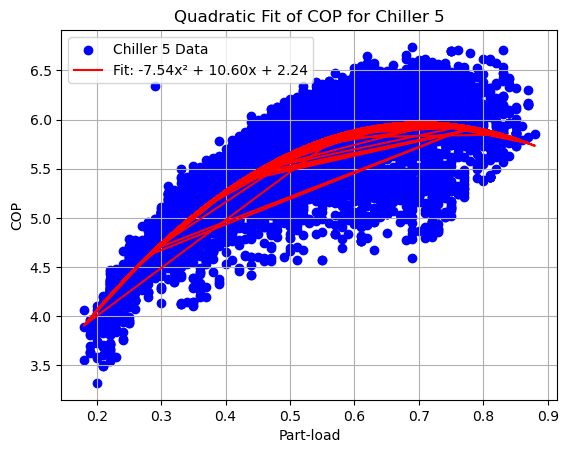

{'Chiller 1': array([-11.91430163,  14.84415802,   0.06763906]), 'Chiller 2': array([-6.46428593, 11.53345535,  1.8657219 ]), 'Chiller 3': array([-14.57564281,  17.96797493,   1.93307002]), 'Chiller 4': array([-5.10378321,  8.71768632,  2.30096335]), 'Chiller 5': array([-7.54132959, 10.60373544,  2.24178958])}


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the Excel file and parse the sheet with chiller data
file_path = "PartLoad Efficiency.xlsx"  # Replace with your file path if different
excel_data = pd.ExcelFile(file_path)
chillers_data = excel_data.parse("Chillers")

# Initialize a dictionary to store the results for all chillers
chillers_coefficients = {}

# Define the chiller columns to process (every 3rd column starting from Chiller 1 COP)
columns = [0, 3, 6, 9, 12]

for idx, col_start in enumerate(columns, start=1):
    # Extract COP and Part-load data for the current chiller
    chiller_data = chillers_data.iloc[:, [col_start, col_start + 1]]
    chiller_data.columns = ["COP", "Part-load"]

    # Clean and prepare the data
    chiller_data = chiller_data.dropna()
    chiller_data["COP"] = pd.to_numeric(chiller_data["COP"], errors="coerce")
    chiller_data["Part-load"] = pd.to_numeric(
        chiller_data["Part-load"], errors="coerce"
    )
    chiller_data = chiller_data.dropna()

    # Fit a quadratic polynomial to the data
    x = chiller_data["Part-load"]
    y = chiller_data["COP"]
    coefficients = np.polyfit(x, y, 2)

    # Store the coefficients
    chillers_coefficients[f"Chiller {idx}"] = coefficients

    # Plot the data and the fitted curve
    plt.scatter(x, y, label=f"Chiller {idx} Data", color="blue")
    plt.plot(
        x,
        np.poly1d(coefficients)(x),
        label=f"Fit: {coefficients[0]:.2f}x² + {coefficients[1]:.2f}x + {coefficients[2]:.2f}",
        color="red",
    )
    plt.xlabel("Part-load")
    plt.ylabel("COP")
    plt.title(f"Quadratic Fit of COP for Chiller {idx}")
    plt.legend()
    plt.grid()
    plt.show()

# Print the coefficients for all chillers
print(chillers_coefficients)
